<a href="https://colab.research.google.com/github/Gilgamesh60/-Unfinished-laptops-ratings-predictor/blob/main/Sentiment_analysis_%26_EDA(unfinished).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
pd.options.plotting.backend = "plotly"

In [ ]:
df=pd.read_csv('laptops.csv')
df

,Unnamed: 0,Company,model,price,R.A.M,Total_storage,No_of_Ratings,No_of_Reviews,storage,storage_type,Review1,Review2,Review3,Review4,Review5,Ratings,Description
0,0,acer,"['One', '10', 'Atom', 'Quad', 'Core', '']",15190,2,32,1509.0,327.0,32,SSD,great tablet price,must buy,fantastic purchase_steps get best performance,terrific,terrific purchase,4.0,this product tick all the boxes for the tablet...
1,1,HP,"['APU', 'Pro', 'A4', '']",16990,4,32,869.0,105.0,32,EMMC,great product,highly recommended,simply awesome,really nice,wow,3.5,design wise its slim and easy to carry camera ...
2,2,Lenovo,"['APU', 'Dual', 'Core', 'E2', 'E2-9000', '7th'...",18890,4,1000,58.0,5.0,1000,HDD,nice,decent product,terrific purchase,valueformoney,great product,3.3,this chromebook is very useful simple fast and...
3,3,Micromax,"['Canvas', 'Laptab', 'II', '(WIFI)', 'Atom', '...",18999,2,32,1290.0,157.0,32,EMMC,fabulous,fabulous,pretty good,battery backup amazing,great product,3.5,handy smart lightweight device good processing...
4,4,ASUS,"['Chromebook', 'Celeron', 'Dual', 'Core', '']",19174,4,32,1137.0,257.0,32,EMMC,best market,met expectations except installed ram,excellent,fair,highly recommended,3.6,very much disappointingi got it on september a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,709,MSI,"['GF65', 'Thin', 'Core', 'i7', '10th', 'Gen', '']",85990,16,1000,10.0,1.0,1000,HDD,simply awesome,perfect product,NaN,absolute rubbish,NaN,3.9,NaN
710,710,ASUS,"['Zenbook', '14', 'OLED', '(2022)', 'Intel', '...",86000,16,256,120.0,21.0,256,SSD,excellent,perfect product,NaN,terrific,worth every penny,4.1,this laptop is a superb one amazing performanc...
711,711,ASUS,"['Vivobook', 'Pro', '14', 'OLED', '(2021)', 'R...",86000,8,512,84.0,9.0,512,SSD,NaN,NaN,fabulous,NaN,NaN,4.4,NaN
712,712,DELL,"['Vostro', 'Core', 'i5', '12th', 'Gen', '']",86990,16,1000,7.0,0.0,1000,SSD,worth every penny,job,NaN,NaN,awesome,4.3,an affordable beast pros incredible performanc...


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df=df.drop('Total_storage',axis=1)

In [ ]:
df.isnull().sum()

Company            0
model              0
price              0
R.A.M              0
No_of_Ratings      0
No_of_Reviews     14
storage            0
storage_type       0
Review1          215
Review2          244
Review3          282
Review4          320
Review5          335
Ratings            0
Description      195
dtype: int64

#Feature engineering 


**let's first work on description column**

In [ ]:
df.dropna(subset=['Description'],inplace=True)

In [ ]:
# Lets calculate the length of the Reviews
df['Description_length'] = df['Description'].apply(len)

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['Description_polarity'] = df['Description'].apply(get_polarity)

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['Description_subjectivity'] = df['Description'].apply(get_subjectivity)

In [ ]:
## lets summarize the Newly Created Features
df[['Description_length','Description_polarity','Description_subjectivity']].describe()

,Description_length,Description_polarity,Description_subjectivity
count,519.000000,519.000000,519.000000
mean,223.857418,0.392688,0.603490
std,171.408313,0.316558,0.187308
min,2.000000,-1.000000,0.000000
25%,49.000000,0.246577,0.500000
50%,207.000000,0.387333,0.600000
75%,409.000000,0.596955,0.694167
max,491.000000,1.000000,1.000000


In [ ]:
# calculating the Word Count
df['word_count'] = df['Description'].apply(lambda x: len(x.split()))

In [ ]:
# Calculating the Word Density
df['word_density'] = df['Description_length'] / (df['word_count']+1)

In [ ]:
## lets summarize the Newly Created Features
df[['Description_length','word_count','word_density']].describe()

,Description_length,word_count,word_density
count,519.000000,519.000000,519.000000
mean,223.857418,40.897881,5.082553
std,171.408313,31.793785,0.830533
min,2.000000,1.000000,1.000000
25%,49.000000,8.500000,4.878289
50%,207.000000,38.000000,5.271739
75%,409.000000,74.000000,5.571429
max,491.000000,103.000000,6.660377


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


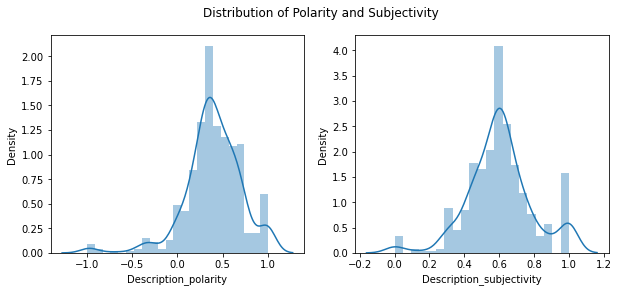

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['Description_polarity'])

plt.subplot(1, 2, 2)
sns.distplot(df['Description_subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

In [ ]:
df['Description_polarity'].plot(kind='hist')

In [ ]:
df['Description_length'].plot(kind='hist')

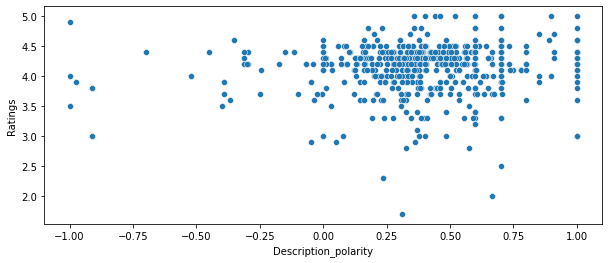

In [ ]:
sns.scatterplot(x='Description_polarity',y='Ratings',data=df)

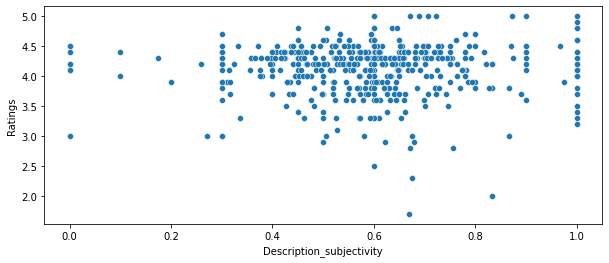

In [ ]:
sns.scatterplot(x='Description_subjectivity',y='Ratings',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



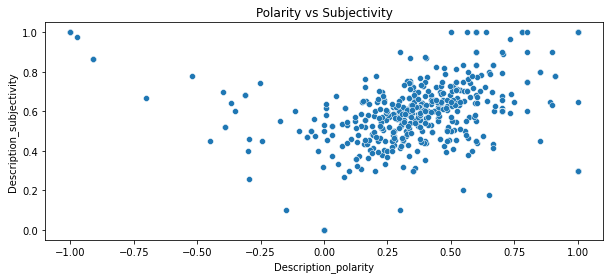

In [ ]:
sns.scatterplot(df['Description_polarity'], df['Description_subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

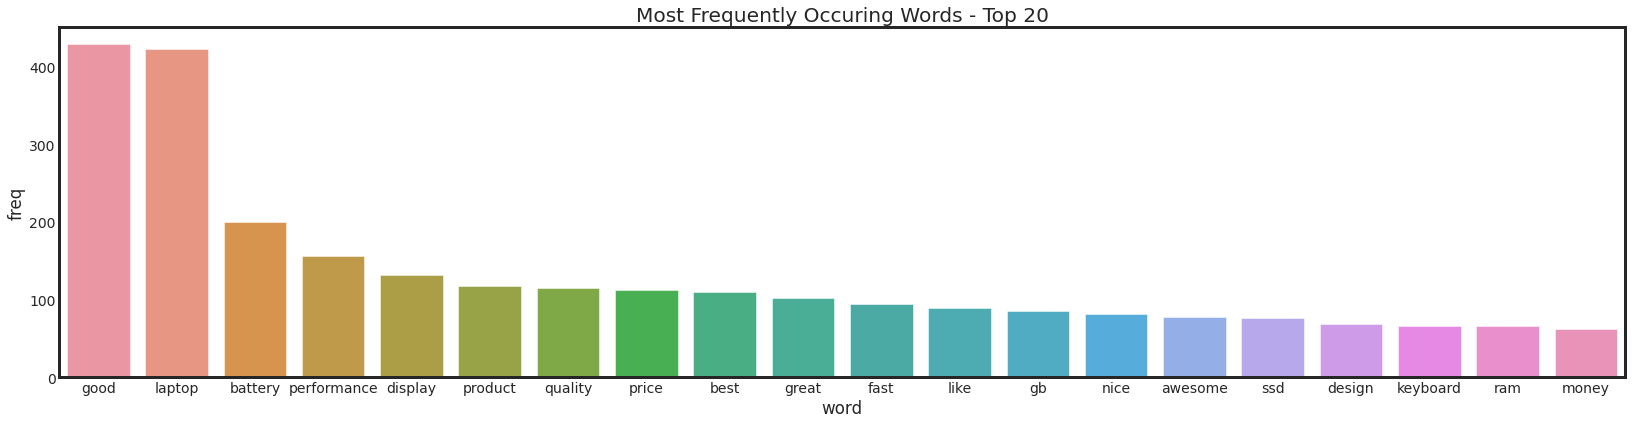

In [ ]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Description)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
sns.barplot(x='word',y='freq',data=frequency.head(20), ax=ax)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [ ]:
df=pd.read_csv('laptops.csv')

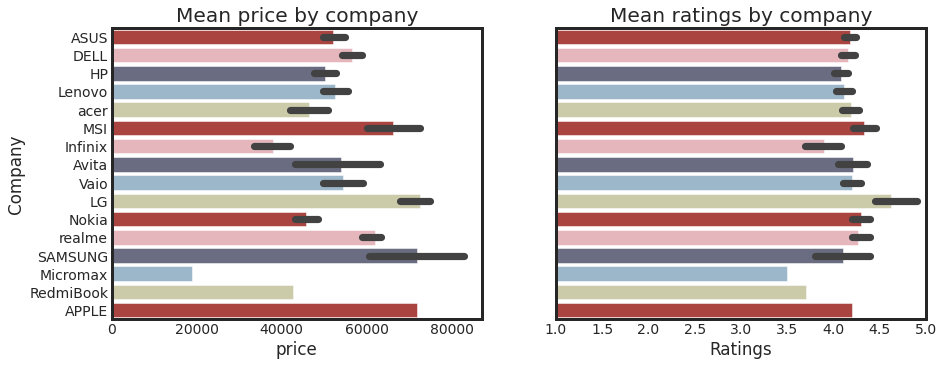

In [ ]:
colors = ['#BB342F', '#EDAFB8', '#666A86', '#95B8D1', '#D1D0A3']
categories_index = df['Company'].value_counts().index
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5))

ax1.set_title('Mean price by company')
sns.barplot(x = 'price', y = 'Company', data = df, order = categories_index, palette = colors, ax = ax1)

ax2.set_title('Mean ratings by company')
sns.barplot(x = 'Ratings', y = 'Company', data = df, order = categories_index, palette = colors, ax = ax2)
ax2.set(yticklabels = [])
ax2.set_ylabel('')
ax2.set_xlim(1,5);

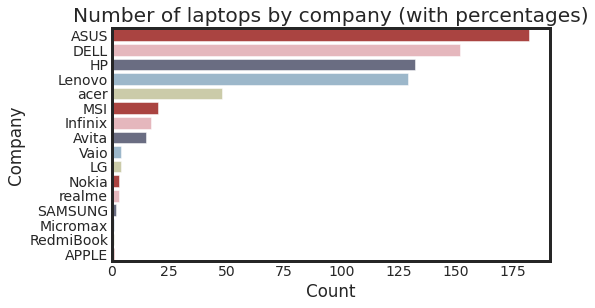

In [ ]:
fig = plt.figure(figsize = (7, 4))
sns.countplot(y = 'Company', data = df, palette = colors, order = df['Company'].value_counts().index)

# include the percentage of each company next to each bar
for index, value in enumerate(df['Company'].value_counts()):
    label =  '{}%'.format(round( (value/df['Company'].shape[0])*100, 2)) 
    
plt.title('Number of laptops by company (with percentages)')
plt.ylabel('Company')
plt.xlabel('Count');

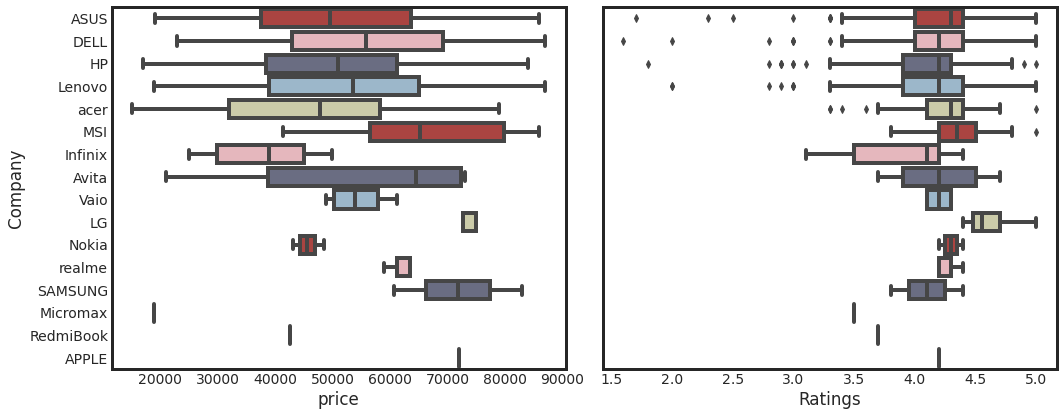

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

sns.boxplot(x = 'price', y = 'Company', data = df, order = categories_index, palette = colors, showfliers = False, ax = ax1)
sns.boxplot(x = 'Ratings', y = 'Company', data = df, order = categories_index, palette = colors, ax = ax2)
ax2.set(yticklabels = [])
ax2.set_ylabel('')

plt.tight_layout()

(1.0, 5.0)

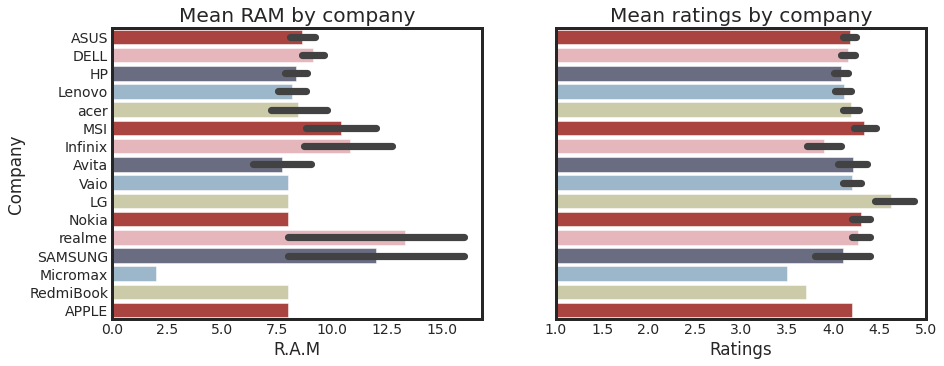

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5))

ax1.set_title('Mean RAM by company')
sns.barplot(x = 'R.A.M', y = 'Company', data = df, order = categories_index, palette = colors, ax = ax1)

ax2.set_title('Mean ratings by company')
sns.barplot(x = 'Ratings', y = 'Company', data = df, order = categories_index, palette = colors, ax = ax2)
ax2.set(yticklabels = [])
ax2.set_ylabel('')
ax2.set_xlim(1,5)

In [ ]:
df['ratio']=df['No_of_Reviews']/df['No_of_Ratings']

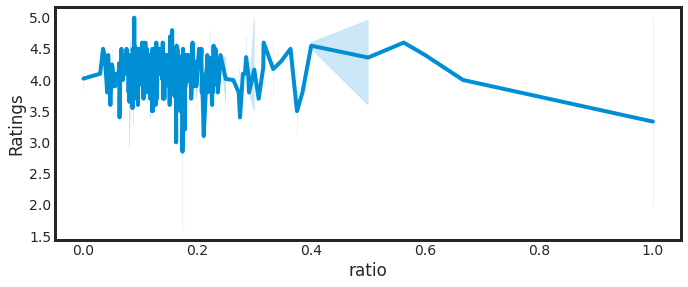

In [ ]:
sns.lineplot(x='ratio',y='Ratings',data=df)

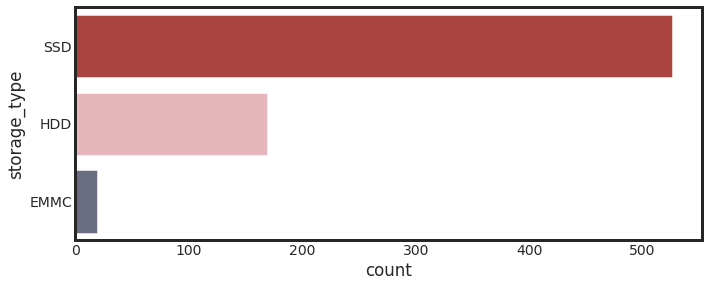

In [ ]:
sns.countplot(y = 'storage_type', data = df, palette = colors, order = df['storage_type'].value_counts().index)

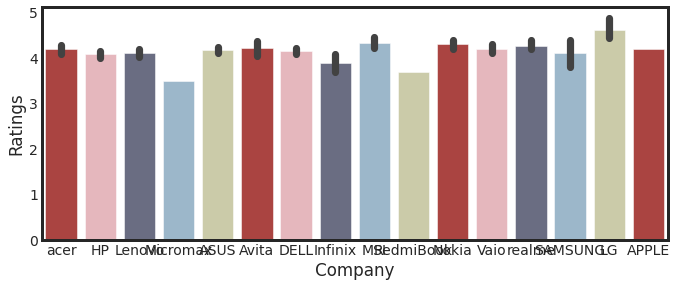

In [ ]:
sns.barplot(x = 'Company',y='Ratings', data = df, palette = colors)

In [ ]:
for i in range(5):
  df.replace({f'Review{i+1}':{np.nan:''}},inplace=True)
df.replace({'Description':{np.nan:''}},inplace=True)
df['tot_polarity']=df['Review1'].apply(get_polarity)+df['Review2'].apply(get_polarity)+df['Review3'].apply(get_polarity)+df['Review4'].apply(get_polarity)+df['Review5'].apply(get_polarity)
df['tot_subjectivity']=df['Review1'].apply(get_subjectivity)+df['Review2'].apply(get_subjectivity)+df['Review3'].apply(get_subjectivity)+df['Review4'].apply(get_subjectivity)+df['Review5'].apply(get_subjectivity)
df['Description_polarity']=df['Description'].apply(get_polarity)
df['Description_subjectivity']=df['Description'].apply(get_subjectivity)
df

,Unnamed: 0,Company,model,price,R.A.M,Total_storage,No_of_Ratings,No_of_Reviews,storage,storage_type,...,Review3,Review4,Review5,Ratings,Description,ratio,tot_polarity,tot_subjectivity,Description_polarity,Description_subjectivity
0,0,acer,"['One', '10', 'Atom', 'Quad', 'Core', '']",15190,2,32,1509.0,327.0,32,SSD,...,fantastic purchase_steps get best performance,terrific,terrific purchase,4.0,this product tick all the boxes for the tablet...,0.216700,1.500000,3.350000,0.325000,0.475000
1,1,HP,"['APU', 'Pro', 'A4', '']",16990,4,32,869.0,105.0,32,EMMC,...,simply awesome,really nice,wow,3.5,design wise its slim and easy to carry camera ...,0.120829,2.660000,4.290000,0.305556,0.426389
2,2,Lenovo,"['APU', 'Dual', 'Core', 'E2', 'E2-9000', '7th'...",18890,4,1000,58.0,5.0,1000,HDD,...,terrific purchase,valueformoney,great product,3.3,this chromebook is very useful simple fast and...,0.086207,1.566667,3.416667,0.239000,0.335714
3,3,Micromax,"['Canvas', 'Laptab', 'II', '(WIFI)', 'Atom', '...",18999,2,32,1290.0,157.0,32,EMMC,...,pretty good,battery backup amazing,great product,3.5,handy smart lightweight device good processing...,0.121705,2.675000,4.450000,0.574603,0.746032
4,4,ASUS,"['Chromebook', 'Celeron', 'Dual', 'Core', '']",19174,4,32,1137.0,257.0,32,EMMC,...,excellent,fair,highly recommended,3.6,very much disappointingi got it on september a...,0.226033,2.860000,2.740000,-0.036667,0.475238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,709,MSI,"['GF65', 'Thin', 'Core', 'i7', '10th', 'Gen', '']",85990,16,1000,10.0,1.0,1000,HDD,...,,absolute rubbish,,3.9,,0.100000,2.200000,2.900000,0.000000,0.000000
710,710,ASUS,"['Zenbook', '14', 'OLED', '(2022)', 'Intel', '...",86000,16,256,120.0,21.0,256,SSD,...,,terrific,worth every penny,4.1,this laptop is a superb one amazing performanc...,0.175000,2.300000,3.100000,0.602500,0.675000
711,711,ASUS,"['Vivobook', 'Pro', '14', 'OLED', '(2021)', 'R...",86000,8,512,84.0,9.0,512,SSD,...,fabulous,,,4.4,,0.107143,0.400000,1.000000,0.000000,0.000000
712,712,DELL,"['Vostro', 'Core', 'i5', '12th', 'Gen', '']",86990,16,1000,7.0,0.0,1000,SSD,...,,,awesome,4.3,an affordable beast pros incredible performanc...,0.000000,1.300000,1.100000,0.317980,0.585657


In [ ]:
df=df.drop(['Review1','Review2','Review3','Review4','Review5','Description','Unnamed: 0'],axis=1)

In [ ]:
df

,Company,model,price,R.A.M,Total_storage,No_of_Ratings,No_of_Reviews,storage,storage_type,Ratings,ratio,tot_polarity,tot_subjectivity,Description_polarity,Description_subjectivity
0,acer,"['One', '10', 'Atom', 'Quad', 'Core', '']",15190,2,32,1509.0,327.0,32,SSD,4.0,0.216700,1.500000,3.350000,0.325000,0.475000
1,HP,"['APU', 'Pro', 'A4', '']",16990,4,32,869.0,105.0,32,EMMC,3.5,0.120829,2.660000,4.290000,0.305556,0.426389
2,Lenovo,"['APU', 'Dual', 'Core', 'E2', 'E2-9000', '7th'...",18890,4,1000,58.0,5.0,1000,HDD,3.3,0.086207,1.566667,3.416667,0.239000,0.335714
3,Micromax,"['Canvas', 'Laptab', 'II', '(WIFI)', 'Atom', '...",18999,2,32,1290.0,157.0,32,EMMC,3.5,0.121705,2.675000,4.450000,0.574603,0.746032
4,ASUS,"['Chromebook', 'Celeron', 'Dual', 'Core', '']",19174,4,32,1137.0,257.0,32,EMMC,3.6,0.226033,2.860000,2.740000,-0.036667,0.475238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,MSI,"['GF65', 'Thin', 'Core', 'i7', '10th', 'Gen', '']",85990,16,1000,10.0,1.0,1000,HDD,3.9,0.100000,2.200000,2.900000,0.000000,0.000000
710,ASUS,"['Zenbook', '14', 'OLED', '(2022)', 'Intel', '...",86000,16,256,120.0,21.0,256,SSD,4.1,0.175000,2.300000,3.100000,0.602500,0.675000
711,ASUS,"['Vivobook', 'Pro', '14', 'OLED', '(2021)', 'R...",86000,8,512,84.0,9.0,512,SSD,4.4,0.107143,0.400000,1.000000,0.000000,0.000000
712,DELL,"['Vostro', 'Core', 'i5', '12th', 'Gen', '']",86990,16,1000,7.0,0.0,1000,SSD,4.3,0.000000,1.300000,1.100000,0.317980,0.585657


In [ ]:
shuffled = df.sample(frac=1)
shuffled

,Company,model,price,R.A.M,Total_storage,No_of_Ratings,No_of_Reviews,storage,storage_type,Ratings,ratio,tot_polarity,tot_subjectivity,Description_polarity,Description_subjectivity
150,Lenovo,"['Core', 'i3', '10th', 'Gen', '']",38290,8,256,5.0,0.0,256,SSD,3.0,0.000000,1.400000,1.200000,0.000000,0.000000
419,ASUS,"['VivoBook', '15', '(2022)', 'Core', 'i7', '10...",56834,8,512,33.0,3.0,512,SSD,4.4,0.090909,2.300000,2.100000,0.222222,0.611111
542,LG,"['Gram', '14', 'Core', 'i5', '10th', 'Gen', '']",65556,8,512,436.0,45.0,512,SSD,4.6,0.103211,3.000000,3.300000,-0.350000,0.600000
647,DELL,"['Inspiron', 'Core', 'i5', '11th', 'Gen', '']",77490,8,512,209.0,57.0,512,SSD,4.4,0.272727,0.000000,0.000000,0.346667,0.609167
473,DELL,"['Core', 'i5', '11th', 'Gen', '']",59999,8,512,97.0,15.0,512,SSD,4.4,0.154639,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,HP,"['Core', 'i3', '11th', 'Gen', '']",40990,8,256,1160.0,184.0,256,SSD,4.1,0.158621,1.500000,1.500000,0.800000,0.600000
98,DELL,"['Inspiron', 'Pentium', 'Silver', '']",33590,8,256,9.0,0.0,256,SSD,4.2,0.000000,-1.300000,2.900000,0.031429,0.527143
517,ASUS,"['Vivobook', 'Gaming', 'Core', 'i7', '10th', '...",63990,16,512,526.0,92.0,512,SSD,4.5,0.174905,0.333333,0.666667,0.000000,0.000000
374,Lenovo,"['IdeaPad', 'Gaming', 'Core', 'i5', '11th', 'G...",53490,8,512,223.0,25.0,512,SSD,3.6,0.112108,1.460000,3.440000,0.144048,0.524206


In [ ]:
from sklearn.linear_model import LinearRegression
  
 # create regressor object
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.predict(X_test)

array([4.07811769, 4.10337525, 4.09222466, 4.13312902, 4.4704833 ,
       4.17465598, 4.33574926, 3.98999521, 4.13535855, 3.9900693 ,
       4.0058599 , 4.06080467, 4.20833949, 4.36498174, 4.29816218,
       3.87017632, 4.06967571, 4.28352379, 4.08494452, 4.25886476,
       4.03490655, 4.09606113, 3.85899901, 4.14097247, 4.1802699 ,
       4.13816551, 4.09665966, 3.91632299, 4.32282122, 3.89106036,
       4.15951444, 4.28025379, 4.20553253, 4.31890751, 4.27229595,
       4.10893303, 3.83587515, 4.10618728, 4.24372321, 4.37334648,
       4.03554204, 4.11009592, 4.23648126, 3.94012653, 4.30951518,
       4.34527689, 4.04789266, 4.28913771, 4.12864296, 4.20998146,
       4.37059566, 4.14823046, 4.29475163, 4.11460309, 4.34007279,
       4.23079517, 4.13091795, 4.12974464, 4.16904206, 3.98411744,
       4.14272321, 4.18874692, 4.08764025, 4.10234767, 4.15622333,
       4.02759243, 4.23249537, 4.27351708, 4.08483329, 3.98445538,
       4.01636459, 4.11009592, 4.11857855, 4.16342815, 4.10730

In [ ]:
regressor.score(X_test,y_test)

0.09433034749842506